In [4]:
import re

#(a)
def cpr_reader(cpr: str):
    """Takes in a CPR string and returns a tuple of following format (DD, MM, YY, IIII)"""
    pattern = re.compile(r"([0-9]{2})([0-9]{2})([0-9]{2})-([0-9]{4})")
    return re.findall(pattern, cpr)[0]

#using followig format (ID-range, year-range, century) to determine year of birth
cpr_system = [
    ((1, 3999), (0,99), 1900),
    ((4000,4999), (0,36), 2000),
    ((4000, 4999),(37, 99), 1900), 
    ((5000, 8999), (0, 57), 2000), 
    ((5000, 8999), (58, 99), (1800)), 
    ((9000, 9999), (0, 36), 2000), 
    ((9000, 9999), (37, 99), 1900)]

#(b)
def cpr_century(year: int, id: int):
    """Returns the correct century for the given CPR number"""
    
    for row in cpr_system:
        id_start, id_end = row[0]
        year_start, year_end = row[1]
        century = row[2]
        
        if (id_start < id < id_end) and (year_start < year < year_end):
            return century
    
    return -1

In [5]:
import requests
from cleantext import clean

#importing the CVS file as raw text
data_fake_news = requests.get("https://raw.githubusercontent.com/several27/FakeNewsCorpus/master/news_sample.csv").text

def clean_text(text: str):
    """cleans the fake_news raw data using re.sub(), to remove double newlines and """
    text = text.lower()
    
    num_pattern = re.compile(r"(\d+)")
    date_pattern = re.compile(r"((\d{2})-(\d{2})-(\d{4}))") #usind the dd-mm-yyyy format
    email_pattern = re.compile(r"(([\w\-_.]*)(@\w+)(.com))")
    url_pattern = re.compile(r"http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\\(\\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+")
    
    text = re.sub(" +", " ", text)
    text = re.sub("\t+", "\t", text)
    text = re.sub("\n+", "\n", text)
    text = re.sub(date_pattern, "<DATE>", text)
    text = re.sub(email_pattern, "<EMAIL>", text)
    text = re.sub(url_pattern, "<URL>", text)
    text = re.sub(num_pattern, "<NUM>", text)
    
    return text

data_manual_clean = clean_text(data_fake_news)

#using clean-text module, we can have (almost) the same functionality as the clean_text function. 
data_module_clean = clean(data_fake_news,
    lower=True,                   # lowercase text
    normalize_whitespace=True,    # fully strip line breaks as opposed to only normalizing them
    no_urls=True,                 # replace all URLs with a special token
    no_emails=True,               # replace all email addresses with a special token
    no_numbers=True,              # replace all numbers with a special token
    replace_with_url="<URL>",
    replace_with_email="<EMAIL>",
    replace_with_number="<NUM>",)


Note: The clean method in the cleantext module does not have any date cleaning.

number of unique words before preprocessing: 32228
number of unique words after preprocessing: 27252


C:\Users\Maher\AppData\Local\Temp\ipykernel_22964\3261191509.py:32: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs.set_xticklabels(x, rotation=90) #so all 50 words can fit


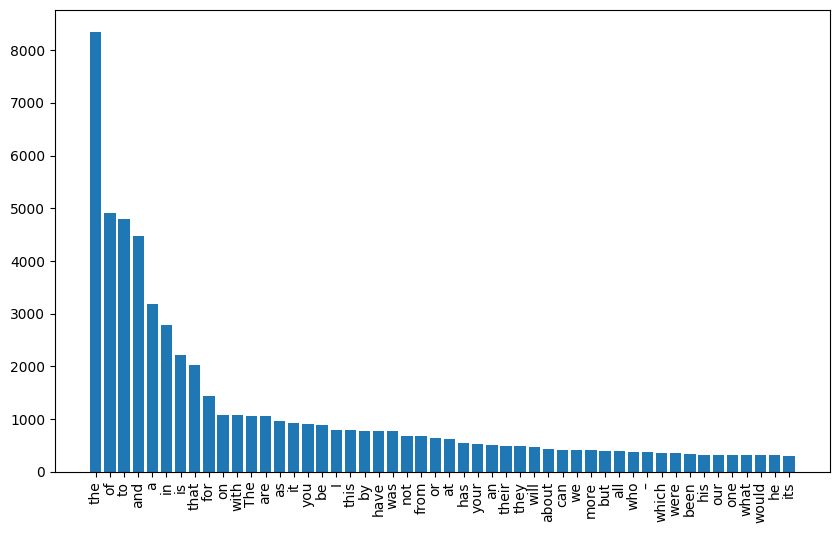

In [6]:
import matplotlib.pylab as plt

def unique_words_count(text: str):
    """returns the number of unique words in a string, 
    where all characters seperated by a space count as a word"""
    return len(set(text.split()))

def unique_words_plot(text: str):
    """returns a graph of the top 50 most used unique words in a string, 
    where all characters seperated by a space count as a word."""
    words = {}
    for word in text.split():
        if word in words.keys():
            words[word] += 1
        else:
            words[word] = 1
    
    #sorting the dictionary into a list of tuples by word count in decending order
    sorted_words = sorted(words.items(), key = lambda x:x[1], reverse = True)
    
    #create two axis by only including first 50 elements
    x = []
    y = []
    for i in range(50):
        word, count = sorted_words[i]
        x.append(word)
        y.append(count)

    #barplot
    _, axs = plt.subplots(figsize = (10, 6))
    axs.bar(x, y)
    axs.set_xticklabels(x, rotation=90) #so all 50 words can fit
    plt.show()
    

print("number of unique words before preprocessing: " + str(unique_words_count(data_fake_news)))
print("number of unique words after preprocessing: " + str(unique_words_count(data_module_clean)))

unique_words_plot(data_fake_news)

Note: In this exercise i chose to define a word as any space-seperated characters, as we are analysing the most frequent words. If we wanted a complete dataset of all real words in the data, we would clean the data differently of course, but this is not necessary for the given task. The unique_words_plot runs on the uncleaned data, since it is more relevant to get real words in our top 50, than the tags we used for data cleaning. These tags could be ignored in the unique_words_plot function, but would not change the outcome at all.